## Логистическая регрессия

В этом практическом задании три обязательных и одна дополнительная задача. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
*Дополнительная задача* для тех, кто хочет потренироваться в подготовке данных для обучения модели. 
<br>
Удачи!

Цели практического задания: 

1.   Научиться пользоваться моделью логистической регрессии.
2.   Потренироваться в обучении модели с фичами разного типа.
3.   Научиться получать вероятности на выходе из логистической регрессии.




Мы будем решать задачу по прогнозированию вероятности инсульта у пациента на основе его входных параметров.

По данным Всемирной организации здравоохранения, инсульт является второй ведущей причиной смерти в мире, на его долю приходится примерно 11% от общего числа смертей. Именно поэтому раннее прогнозирование возникновения инсульта у пациента является актуальной для здравоохранения задачей.


Описание данных: 

*gender*: пол;

*age*: возраст;

*hypertension*: страдает ли пациент гипертонией;

*heart_disease*: есть ли болезни сердца;

*ever_married*: был ли женат/замужем;

*work_type*: тип работы;

*Residence_type*: проживает в городе или селе;

*avg_glucose_level*: средний уровень глюкозы;

*bmi*: индекс массы тела;

*smoking_status*: информация о курении;

*stroke*: целевая переменная — был инсульт или нет.

## Обязательные задачи

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('data/stroke_data.csv')
print(df.shape)
df.head()

(4000, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,73,0,0,1,Private,1,143.509078,29.160236,formerly smoked,1
1,Female,49,0,0,1,Private,0,85.230000,25.400000,Unknown,0
2,Male,58,0,0,1,Private,0,197.174377,34.870606,formerly smoked,1
3,Female,69,0,0,1,Self-employed,1,99.680000,17.600000,formerly smoked,0
4,Male,60,0,0,1,Private,0,69.200000,30.900000,never smoked,0


**Задача 0. Первая модель логистической регрессии**

Воспроизведите обучение модели логистической регрессии из видео. Для этого:
- поделите данные из df на треин и тест в отношении 70/30;
- инициализируйте модель логистической регрессии с дефолтными параметрами;
- обучите модель на одной колонке из тренировочных данных: `age`;
- сделайте предсказание для тестовых данных и посчитайте значение метрики точности, а также выведите confusion matrix.

In [10]:
# Ваш код здесь
x = df.drop(["stroke"], axis=1)
y = df["stroke"]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
train_cols = ['age']

log_reg.fit(train_x[train_cols], train_y)
predicted = log_reg.predict(test_x[train_cols])

accuracy_score(test_y, predicted)

0.7683333333333333

In [11]:
confusion_matrix(test_y, predicted)

array([[448, 156],
       [122, 474]])

**Задача 1. Логистическая регрессия на количественных и бинарных фичах**

Попробуйте обучить логистическую регрессию, добавив в нее остальные количественные фичи. Для этого проделайте следующее:
- найдите количественные фичи (это фичи, которые могут принимать любые числовые значения, количество их возможных значений НЕ конечно);
- обучите на них модель логистической регрессии, и замерьте качество;
- добавьте все бинарные фичи в обучение (бинарные фичи — те, которые могут принимать только два значения);
- обучите на них модель логистической регрессии и замерьте качество.


*Заметка:* обратите внимание на колонку `gender`. В ней есть одна запись, которая заполнена неверно. Удалите эту запись прежде, чем обучать модели в этом задании.

In [25]:

ind = df[df['gender'] == "255"].index[0]
df = df.drop(ind)
df.iloc[1785:1790,:]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1786,Female,70,0,0,1,Private,1,221.58,47.5,never smoked,1
1787,Female,42,0,0,1,Private,1,92.20,34.2,Unknown,0
1788,Female,37,0,0,1,Private,0,94.77,48.9,Unknown,0
1789,Male,78,1,0,1,Self-employed,0,134.80,33.6,Unknown,1
1790,Male,46,0,0,1,Private,0,114.46,24.7,formerly smoked,0


In [42]:
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1
df.gender = df.gender.replace({'Male': 1, 'Female': 0})

In [60]:
quant_feature = ['age', 'avg_glucose_level', 'bmi']
binar_feature = ['hypertension', 'heart_disease', 'ever_married','Residence_type', 'gender']

x = df[quant_feature]
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
pred = log_reg.predict(x_test)

print(confusion_matrix(y_test, pred))
accuracy_score(y_test, pred)


[[439 146]
 [122 493]]


0.7766666666666666

In [62]:
# поставил 1000 потому что при фите выдал ошибку, скорее всего алгоритм не сходится,
#  Предупреждение также указывает на масштабирование данных
# Вы можете попробовать использовать другой решатель, такой как 'sag' или 'liblinear', чтобы увидеть, 
# сходится ли модель с использованием другого алгоритма.
x = df[quant_feature + binar_feature]
y = df['stroke']
log_reg = LogisticRegression(max_iter=1000) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [63]:
pred = log_reg.predict(x_test)

print(confusion_matrix(y_test, pred))
accuracy_score(y_test, pred)

[[471 114]
 [116 499]]


0.8083333333333333

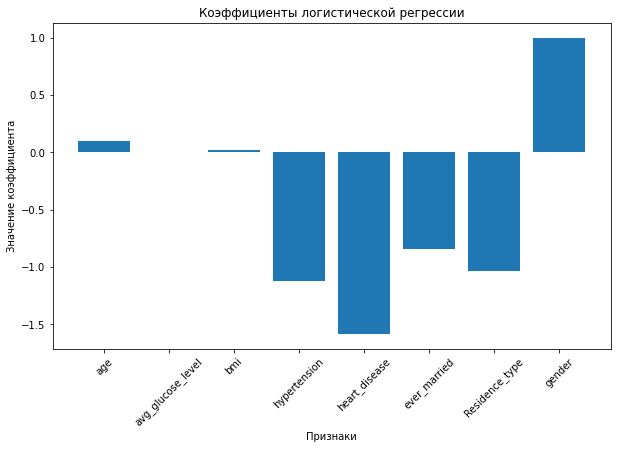

In [66]:
a = log_reg.coef_
coef_list = list(zip(x_train.columns, a))
b = pd.DataFrame(coef_list, columns=['Feature', 'Coefficient'])

# Предположим, что коэффициенты хранятся в переменной a
feature_names = x_train.columns  # Замените на реальные названия признаков

plt.figure(figsize=(10, 6))
plt.bar(feature_names, a[0])  # Предполагая, что a содержит коэффициенты для одного класса в задаче многоклассовой классификации

plt.title('Коэффициенты логистической регрессии')
plt.xlabel('Признаки')
plt.ylabel('Значение коэффициента')
plt.xticks(rotation=45)
plt.show()

In [67]:
Random Forest:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

Permutation Importance:

from sklearn.inspection import permutation_importance
perm_importance_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

XGBoost:

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

Stats Models:

import statsmodels.formula.api as smf
model = smf.logit('Survived~Sex+Age+Embarked+Pclass+SibSp+Parch', data=data)
result = model.fit()
feature_importances = pd.DataFrame(result.conf_int()[1]).
                        rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")

Linear Regression:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
importances = model.coef_

Decision Tree:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_


Для замера качества логистической регрессии можно использовать различные метрики и методы оценки. Вот несколько распространенных способов:


Матрица ошибок (Confusion Matrix): Матрица ошибок позволяет оценить производительность модели, сравнивая фактические и предсказанные значения классов. Из матрицы ошибок можно вычислить метрики, такие как точность (accuracy), полноту (recall), точность (precision) и F1-меру (F1-score).

Кросс-валидация (Cross-Validation): Кросс-валидация позволяет оценить обобщающую способность модели путем разделения данных на обучающую и тестовую выборки. Можно использовать методы кросс-валидации, такие как K-fold или Stratified K-fold, чтобы получить более надежные оценки качества модели.

Кривая ROC (Receiver Operating Characteristic): Кривая ROC позволяет оценить способность модели различать между классами. Она показывает зависимость между чувствительностью (True Positive Rate) и специфичностью (False Positive Rate) при различных пороговых значениях.

Площадь под кривой ROC (Area Under the ROC Curve, AUC-ROC): AUC-ROC является числовой метрикой, которая измеряет общую производительность модели. Чем выше значение AUC-ROC, тем лучше модель различает между классами.

Логарифмическая функция правдоподобия (Log-Likelihood): Логарифмическая функция правдоподобия позволяет оценить, насколько хорошо модель соответствует данным. Чем выше значение логарифмической функции правдоподобия, тем лучше модель объясняет данные.



SyntaxError: invalid syntax (721007376.py, line 1)

**Задача 2. Предсказание вероятностей с помощью логистической регрессии**

Проверьте, что алгоритм логистической регрессии использует порог=0.5 для предсказания классов. Для этого проделайте следующее:

- Возьмите последнюю обученную модель на бинарных и количественных фичах из предыдущего задания и предскажите вероятности для тестовой выборки с помощью метода `predict_proba`.
- Также с помощью этой обученной модели предскажите классы для тестовой выборки и положите в `pred`.
- Сохраните вероятности в отдельную переменную `pred_probs`.
- Напишите функцию `predict_class(pred_probs, trsh)`, которая пробегает по всем элементам в `pred_probs` и на выходе отдаёт список сформированных из вероятностей классов. Функция должна пробегать по всем элементам в `pred_probs`. Если видит значение вероятности в классе 0 больше trsh (в данном случае 0.5) возвращается класс 1, в противном случае — 0.
- Примените функцию `predict_class` к `pred_probs`. Результат сохраните в `pred_class`.
- Убедитесь, что векторы `pred_class` и  `pred` совпали.
- Попробуйте другие значения порога `trsh` для предсказания класса. Какое значение `trsh` даёт увеличение точности на текущей тестовой выборке?


In [72]:
# Ваш код здесь
pred_probs = log_reg.predict_proba(x_test)
pred = log_reg.predict(x_test)

In [ ]:
def predict_class(pred_probs, trsh=0.5):
  return [0 if x[0]>trsh else 1 for x in pred_probs]

In [ ]:
def predict_class(pred_probs, trsh=0.5):
    
    for i in pred_probs:
        if 
        

## Дополнительные задачи

Добавьте в обучение модели оставшиеся категориальные фичи. Обучите модель логистической регрессии на всех данных, проверьте её качество.

In [ ]:
# Ваш код здесь

-

-

-

-

-

In [ ]:
# Решение (Задача 0)
x = df.drop(['stroke'], axis=1)
y = df.stroke

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)


logreg = LogisticRegression()
train_cols = ['age']
logreg.fit(train_x[train_cols], train_y)

pred = logreg.predict(test_x[train_cols])
accuracy_score(test_y, pred)

0.7683333333333333

In [ ]:
confusion_matrix(test_y, pred)

array([[448, 156],
       [122, 474]])

-

-

-

In [ ]:
# Решение (Задача 1)
df.gender.value_counts()

Male      2141
Female    1858
255          1
Name: gender, dtype: int64

In [ ]:
df = df[df.gender !='255']
x = df.drop(['stroke'], axis=1)
y = df.stroke

In [ ]:
df.gender = df.gender.replace({'Male': 1, 'Female': 0})
df.gender.value_counts()

1    2141
0    1858
Name: gender, dtype: int64

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

num_cols = ['age', 'bmi', 'avg_glucose_level']
logreg.fit(train_x[num_cols], train_y)

pred = logreg.predict(test_x[num_cols])
accuracy_score(test_y, pred)

0.7766666666666666

In [ ]:
confusion_matrix(test_y, pred)

array([[439, 146],
       [122, 493]])

In [ ]:
binary_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married','Residence_type']
logreg.fit(train_x[num_cols + binary_cols], train_y)

pred = logreg.predict(test_x[num_cols + binary_cols])
accuracy_score(test_y, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8075

In [ ]:
confusion_matrix(test_y, pred)

array([[470, 115],
       [116, 499]])

-

-

-

In [ ]:
# Решение (Задача 2)
logreg = LogisticRegression()

logreg.fit(train_x[num_cols + binary_cols], train_y)
pred = logreg.predict(test_x[num_cols + binary_cols])
pred_probs = logreg.predict_proba(test_x[num_cols + binary_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def predict_class(pred_probs, trsh=0.5):
  return [0 if x[0]>trsh else 1 for x in pred_probs]

In [ ]:
pred_class = predict_class(pred_probs)

In [ ]:
list(pred) == pred_class

True

In [ ]:
# тут могут быть разные значения trsh
pred_class = predict_class(pred_probs, 0.6)
accuracy_score(test_y, pred_class)

0.815

Замечание: манипулировать порогом нужно осторожно. Если вы выбрали новое значение порога, например = 0.6, убедитесь, что на тренировочной выборке этот порог также даёт прирост в качестве модели. Иначе вы просто «подгоните» порог для своих текущих тестовых данных.

-

-

-

In [ ]:
# Решение (Дополнительная задача)
cat_cols = ['smoking_status', 'work_type']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
train_enc = pd.DataFrame(ohe.fit_transform(train_x[cat_cols]).toarray(),)
test_enc = pd.DataFrame(ohe.transform(test_x[cat_cols]).toarray(),)

train_enc.head()

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_x = train_x.join(train_enc.set_index(train_x.index)).drop(cat_cols, axis=1)
test_x = test_x.join(test_enc.set_index(test_x.index)).drop(cat_cols, axis=1)
train_x.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,0,1,2,3,4,5,6,7,8
1830,1,61,1,1,0,0,148.240000,32.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3392,1,74,1,0,1,0,194.779099,30.827056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3624,1,80,0,0,1,1,73.479402,24.190924,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1954,0,73,0,0,1,0,98.340000,30.900000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1037,1,80,0,0,1,1,248.408053,29.305082,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
logreg.fit(train_x, train_y)
pred = logreg.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

In [ ]:
accuracy_score(test_y, pred)

0.8241666666666667

In [ ]:
confusion_matrix(test_y, pred)

array([[482, 103],
       [108, 507]])